tobac example: Tracking of precipitation features
===
This example notebook demonstrates the use of tobac to track precipitation features from isolated deep convective clouds.

The simulation results used in this example were performed as part of the ACPC deep convection intercomparison  case study (http://acpcinitiative.org/Docs/ACPC_DCC_Roadmap_171019.pdf) with WRF using the Morrison microphysics scheme.

The data used in this example is downloaded from "zenodo link" automatically as part of the notebooks (This only has to be done once for all the tobac example notebooks).

**Import necessary python libraries:**

In [1]:
# Import libraries
import iris
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import iris.plot as iplt
import iris.quickplot as qplt
import datetime
import shutil
from six.moves import urllib
from pathlib import Path
%matplotlib inline

In [2]:
# Import tobac itself
import tobac
print('using tobac version', str(tobac.__version__))

using tobac version 1.5


In [3]:
# Disable a few warnings:
import warnings
warnings.filterwarnings('ignore', category=UserWarning, append=True)
warnings.filterwarnings('ignore', category=RuntimeWarning, append=True)
warnings.filterwarnings('ignore', category=FutureWarning, append=True)
warnings.filterwarnings('ignore',category=pd.io.pytables.PerformanceWarning)

**Download example data:**

Actual download has to be performed only once for all example notebooks!

In [4]:
data_out=Path('../')

In [5]:
# Download the data: This only has to be done once for all tobac examples and can take a while
data_file = list(data_out.rglob('data/Example_input_Precip.nc'))
if len(data_file) == 0:
    file_path='https://zenodo.org/record/3195910/files/climate-processes/tobac_example_data-v1.0.1.zip'
    #file_path='http://zenodo..'
    tempfile=Path('temp.zip')
    print('start downloading data')
    request=urllib.request.urlretrieve(file_path, tempfile)
    print('start extracting data')
    shutil.unpack_archive(tempfile, data_out)
    tempfile.unlink()
    print('data extracted')
    data_file = list(data_out.rglob('data/Example_input_Precip.nc'))

**Load Data from downloaded file:**

In [6]:
Precip=iris.load_cube(data_file[0],'surface_precipitation_average')

In [7]:
#display information about the iris cube containing the surface precipitation data:
display(Precip)

<iris 'Cube' of surface_precipitation_average / (mm h-1) (time: 47; south_north: 198; west_east: 198)>

In [8]:
#Set up directory to save output and plots:
savedir=Path("Save")
if not savedir.is_dir():
    savedir.mkdir()
plot_dir=Path("Plot")
if not plot_dir.is_dir():
    plot_dir.mkdir()

**Feature detection:**

Feature detection is perfomed based on surface precipitation field and a range of thresholds

In [9]:
# Dictionary containing keyword options (could also be directly given to the function)
parameters_features={}
parameters_features['position_threshold']='weighted_diff'
parameters_features['sigma_threshold']=0.5
parameters_features['min_distance']=0
parameters_features['sigma_threshold']=1
parameters_features['threshold']=[1,2,3,4,5,10,15] #mm/h
parameters_features['n_erosion_threshold']=0
parameters_features['n_min_threshold']=3

In [10]:
# get temporal and spation resolution of the data
dxy,dt=tobac.get_spacings(Precip)

In [11]:
# Feature detection based on based on surface precipitation field and a range of thresholds
print('starting feature detection based on multiple thresholds')
Features=tobac.feature_detection_multithreshold(Precip,dxy,**parameters_features)
print('feature detection done')
Features.to_hdf(savedir / 'Features.h5','table')
print('features saved')

starting feature detection based on multiple thresholds
feature detection done
features saved


In [12]:
Features

frame  idx      hdim_1      hdim_2  num  threshold_value  feature  \
0         0    1   50.065727  139.857477    9                1        1   
1         0   15  120.527119  172.500325    4                1        2   
2         0   18  126.779273  145.368401   15                1        3   
3         0   34  111.611369  155.452030    4                2        4   
4         0   35  111.765231  164.938866    8                2        5   
...     ...  ...         ...         ...  ...              ...      ...   
1124     46   90  163.334480   35.049366   47               15     1125   
1125     46   91  177.119093    1.938903   50               15     1126   
1126     46   92  183.889436  100.054108   36               15     1127   
1127     46   93  196.870749  177.405664   10               15     1128   
1128     46   94  196.936190  191.649040    4               15     1129   

                     time              timestr  south_north   west_east  \
0     2013-06-19 20:05:00  2013-06-19 20:05:00   331.065727  420.857477   
1     2013-06-19 20:05:00  2013-06-19 20:05:00   401.527119  453.500325   
2     2013-06-19 20:05:00  2013-06-19 20:05:00   407.779273  426.368401   
3     2013-06-19 20:05:00  2013-06-19 20:05:00   392.611369  436.452030   
4     2013-06-19 20:05:00  2013-06-19 20:05:00   392.765231  445.938866   
...                   ...                  ...          ...         ...   
1124  2013-06-19 23:55:00  2013-06-19 23:55:00   444.334480  316.049366   
1125  2013-06-19 23:55:00  2013-06-19 23:55:00   458.119093  282.938903   
1126  2013-06-19 23:55:00  2013-06-19 23:55:00   464.889436  381.054108   
1127  2013-06-19 23:55:00  2013-06-19 23:55:00   477.870749  458.405664   
1128  2013-06-19 23:55:00  2013-06-19 23:55:00   477.936190  472.649040   

      projection_y_coordinate           y   latitude  longitude  \
0               165782.863285  331.065727  29.846362 -94.172015   
1               201013.559414  401.527119  30.166929 -93.996892   
2               204139.636582  407.779273  30.196499 -94.139960   
3               196555.684682  392.611369  30.126871 -94.087317   
4               196632.615461  392.765231  30.127221 -94.037226   
...                       ...         ...        ...        ...   
1124            222417.240247  444.334480  30.365944 -94.722384   
1125            229309.546339  458.119093  30.429151 -94.897570   
1126            232694.717873  464.889436  30.458648 -94.377737   
1127            239185.374437  477.870749  30.515366 -93.967334   
1128            239218.094905  477.936190  30.515050 -93.891821   

      projection_x_coordinate           x  
0               210678.738492  420.857477  
1               227000.162468  453.500325  
2               213434.200454  426.368401  
3               218476.015240  436.452030  
4               223219.433218  445.938866  
...                       ...         ...  
1124            158274.683059  316.049366  
1125            141719.451486  282.938903  
1126            190777.054179  381.054108  
1127            229452.832088  458.405664  
1128            236574.520064  472.649040  

[1129 rows x 17 columns]

**Segmentation:**

Segmentation is performed based on a watershedding and a threshold value:

In [13]:
# Dictionary containing keyword arguments for segmentation step:
parameters_segmentation={}
parameters_segmentation['method']='watershed'
parameters_segmentation['threshold']=1  # mm/h mixing ratio

In [14]:
# Perform Segmentation and save resulting mask to NetCDF file:
print('Starting segmentation based on surface precipitation')
Mask,Features_Precip=tobac.segmentation_2D(Features,Precip,dxy,**parameters_segmentation)
print('segmentation based on surface precipitation performed, start saving results to files')
iris.save([Mask], savedir / 'Mask_Segmentation_precip.nc', zlib=True, complevel=4)                
Features_Precip.to_hdf(savedir / 'Features_Precip.h5', 'table')
print('segmentation surface precipitation performed and saved')


Starting segmentation based on surface precipitation
segmentation based on surface precipitation performed, start saving results to files
segmentation surface precipitation performed and saved


In [15]:
Mask

<iris 'Cube' of segmentation_mask / (1) (time: 47; south_north: 198; west_east: 198)>

**Trajectory linking:**

Trajectory linking is performed using the trackpy library (http://soft-matter.github.io/trackpy). This takes the feature positions determined in the feature detection step into account but does not include information on the shape of the identified objects.

In [16]:
# Dictionary containing keyword arguments for the linking step:
parameters_linking={}
parameters_linking['method_linking']='predict'
parameters_linking['adaptive_stop']=0.2
parameters_linking['adaptive_step']=0.95
parameters_linking['extrapolate']=0
parameters_linking['order']=1
parameters_linking['subnetwork_size']=100
parameters_linking['memory']=0
parameters_linking['time_cell_min']=5*60
parameters_linking['method_linking']='predict'
parameters_linking['v_max']=10


In [17]:
# Perform trajectory linking using trackpy and save the resulting DataFrame:
Track=tobac.linking_trackpy(Features,Precip,dt=dt,dxy=dxy,**parameters_linking)
Track.to_hdf(savedir / 'Track.h5', 'table')


Frame 46: 18 trajectories present.


In [18]:
Track

frame  idx      hdim_1      hdim_2  num  threshold_value  feature  \
0         0    1   50.065727  139.857477    9                1        1   
1         0   15  120.527119  172.500325    4                1        2   
2         0   18  126.779273  145.368401   15                1        3   
3         0   34  111.611369  155.452030    4                2        4   
4         0   35  111.765231  164.938866    8                2        5   
...     ...  ...         ...         ...  ...              ...      ...   
1124     46   90  163.334480   35.049366   47               15     1125   
1125     46   91  177.119093    1.938903   50               15     1126   
1126     46   92  183.889436  100.054108   36               15     1127   
1127     46   93  196.870749  177.405664   10               15     1128   
1128     46   94  196.936190  191.649040    4               15     1129   

                     time              timestr  south_north   west_east  \
0     2013-06-19 20:05:00  2013-06-19 20:05:00   331.065727  420.857477   
1     2013-06-19 20:05:00  2013-06-19 20:05:00   401.527119  453.500325   
2     2013-06-19 20:05:00  2013-06-19 20:05:00   407.779273  426.368401   
3     2013-06-19 20:05:00  2013-06-19 20:05:00   392.611369  436.452030   
4     2013-06-19 20:05:00  2013-06-19 20:05:00   392.765231  445.938866   
...                   ...                  ...          ...         ...   
1124  2013-06-19 23:55:00  2013-06-19 23:55:00   444.334480  316.049366   
1125  2013-06-19 23:55:00  2013-06-19 23:55:00   458.119093  282.938903   
1126  2013-06-19 23:55:00  2013-06-19 23:55:00   464.889436  381.054108   
1127  2013-06-19 23:55:00  2013-06-19 23:55:00   477.870749  458.405664   
1128  2013-06-19 23:55:00  2013-06-19 23:55:00   477.936190  472.649040   

      projection_y_coordinate           y   latitude  longitude  \
0               165782.863285  331.065727  29.846362 -94.172015   
1               201013.559414  401.527119  30.166929 -93.996892   
2               204139.636582  407.779273  30.196499 -94.139960   
3               196555.684682  392.611369  30.126871 -94.087317   
4               196632.615461  392.765231  30.127221 -94.037226   
...                       ...         ...        ...        ...   
1124            222417.240247  444.334480  30.365944 -94.722384   
1125            229309.546339  458.119093  30.429151 -94.897570   
1126            232694.717873  464.889436  30.458648 -94.377737   
1127            239185.374437  477.870749  30.515366 -93.967334   
1128            239218.094905  477.936190  30.515050 -93.891821   

      projection_x_coordinate           x  cell       time_cell  
0               210678.738492  420.857477    -1 0 days 00:00:00  
1               227000.162468  453.500325     2 0 days 00:00:00  
2               213434.200454  426.368401    -1 0 days 00:00:00  
3               218476.015240  436.452030     4 0 days 00:00:00  
4               223219.433218  445.938866    -1 0 days 00:00:00  
...                       ...         ...   ...             ...  
1124            158274.683059  316.049366   260 0 days 00:30:00  
1125            141719.451486  282.938903   270 0 days 00:20:00  
1126            190777.054179  381.054108   289 0 days 00:05:00  
1127            229452.832088  458.405664   277 0 days 00:15:00  
1128            236574.520064  472.649040   266 0 days 00:25:00  

[1129 rows x 19 columns]

**Visualistation:**

    

In [19]:
# Set extent for maps plotted in the following cells ( in the form [lon_min,lon_max,lat_min,lat_max])
axis_extent=[-95,-93.8,29.5,30.6]        

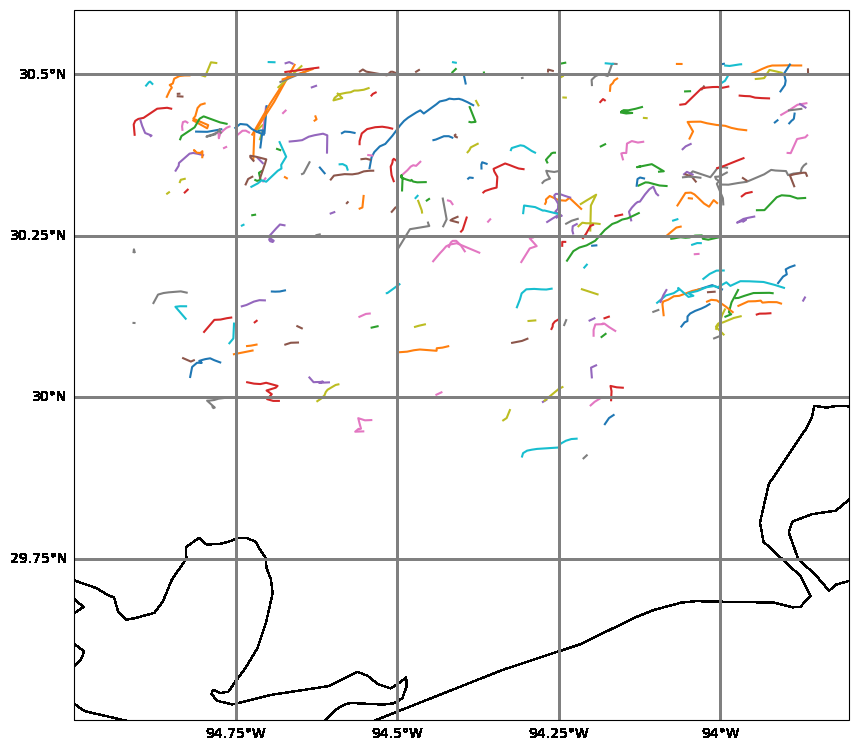

In [20]:
# Plot map with all individual tracks:
import cartopy.crs as ccrs
fig_map,ax_map=plt.subplots(figsize=(10,10),subplot_kw={'projection': ccrs.PlateCarree()})
ax_map=tobac.map_tracks(Track,axis_extent=axis_extent,axes=ax_map)

In [ ]:
# Create animation showing tracked cells with outline of precipitation features and the and surface precipitation as a background field:
animation_tobac=tobac.animation_mask_field(track=Track,features=Features,field=Precip,mask=Mask,
                                          axis_extent=axis_extent,#figsize=figsize,orientation_colorbar='horizontal',pad_colorbar=0.2,
                                          vmin=0,vmax=60,extend='both',cmap='Blues',
                                          interval=500,figsize=(10,10),
                                          plot_outline=True,plot_marker=True,marker_track='x',plot_number=True,plot_features=True)

In [ ]:
# Display animation:
from IPython.display import HTML, Image, display
HTML(animation_tobac.to_html5_video())

In [20]:
# # Save animation to file
# savefile_animation=plot_dir / 'Animation.mp4'
# animation_tobac.save(savefile_animation,dpi=200)
# print(f'animation saved to {savefile_animation}')

Text(0, 0.5, 'counts')

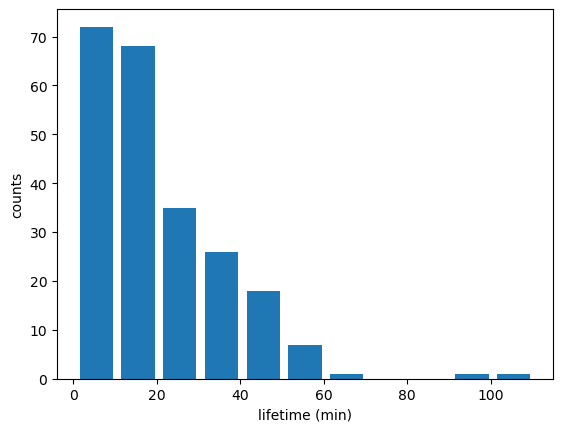

In [21]:
# Lifetimes of tracked features:
fig_lifetime,ax_lifetime=plt.subplots()
tobac.plot_lifetime_histogram_bar(Track,axes=ax_lifetime,bin_edges=np.arange(0,120,10),density=False,width_bar=8)
ax_lifetime.set_xlabel('lifetime (min)')
ax_lifetime.set_ylabel('counts')
         